# Generate Data

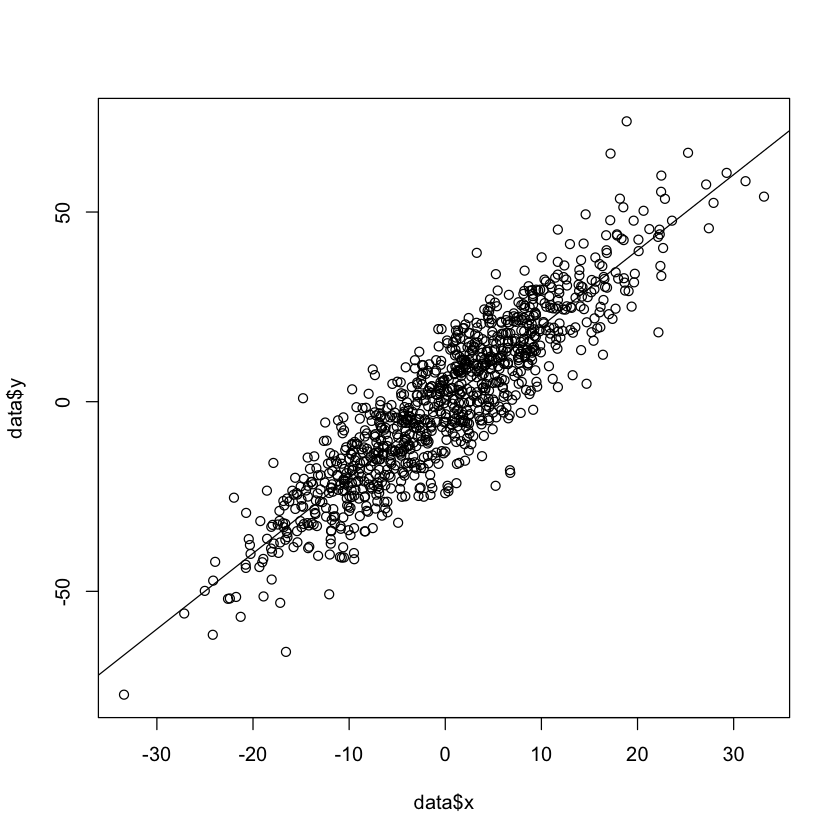

In [1]:
x = rnorm(999,0,10)
y = 2*x + rnorm(999,0,10)
data = data.frame(x,y)

plot(data$x,data$y)
fit1 = lm(y ~ x)
abline(fit1)

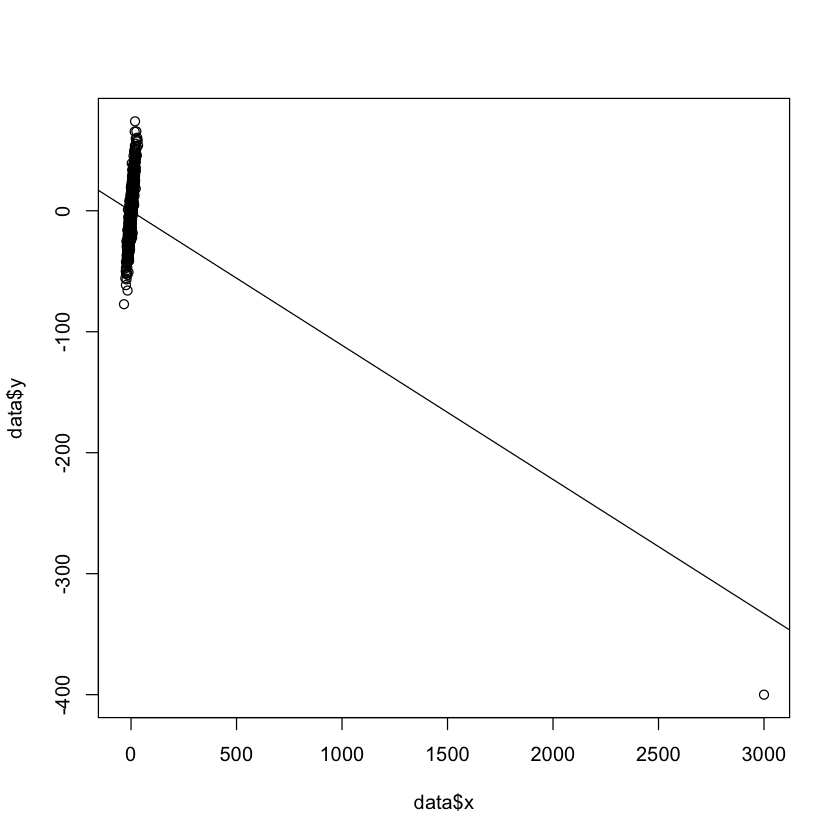

In [2]:
data = rbind(data,c(3000,-400))
plot(data$x,data$y)
fit2 = lm(data$y ~ data$x)
abline(fit2)

summary(fit1)

In [3]:
summary(fit2)


Call:
lm(formula = data$y ~ data$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.722 -16.247  -0.175  15.441  76.232 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.227275   0.720877  -0.315    0.753    
data$x      -0.110939   0.007559 -14.677   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.79 on 998 degrees of freedom
Multiple R-squared:  0.1775,	Adjusted R-squared:  0.1767 
F-statistic: 215.4 on 1 and 998 DF,  p-value: < 2.2e-16


Show's how vulnerable regression is to outliers (check textbook).

Since it is based on least squares, variables with high values have a disproportionately large leerage (influence) on the line of best fit.

__________________

# Q2

In [1]:
library(arm)
library(Matching)
data(lalonde)
head(lalonde)
dim(lalonde)

Loading required package: MASS
Loading required package: Matrix
Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/michelleslee/Documents/code/DataScience

## 
##  Matching (Version 4.9-3, Build Date: 2018-05-03)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



age educ black hisp married nodegr re74 re75 re78     u74 u75 treat
1 37  11   1     0    1       1      0    0     9930.05 1   1   1    
2 22   9   0     1    0       1      0    0     3595.89 1   1   1    
3 30  12   1     0    0       0      0    0    24909.50 1   1   1    
4 27  11   1     0    0       1      0    0     7506.15 1   1   1    
5 33   8   1     0    0       1      0    0      289.79 1   1   1    
6 22   9   1     0    0       1      0    0     4056.49 1   1   1

[1] 445  12

In [42]:
lalonde_control = lalonde[lalonde$treat==0,]
summary(lalonde_control)

      age             educ           black             hisp       
 Min.   :17.00   Min.   : 3.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:19.00   1st Qu.: 9.00   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :24.00   Median :10.00   Median :1.0000   Median :0.0000  
 Mean   :25.05   Mean   :10.09   Mean   :0.8269   Mean   :0.1077  
 3rd Qu.:28.00   3rd Qu.:11.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :55.00   Max.   :14.00   Max.   :1.0000   Max.   :1.0000  
    married           nodegr            re74              re75        
 Min.   :0.0000   Min.   :0.0000   Min.   :    0.0   Min.   :    0.0  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:    0.0   1st Qu.:    0.0  
 Median :0.0000   Median :1.0000   Median :    0.0   Median :    0.0  
 Mean   :0.1538   Mean   :0.8346   Mean   : 2107.0   Mean   : 1266.9  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:  139.4   3rd Qu.:  650.1  
 Max.   :1.0000   Max.   :1.0000   Max.   :39570.7   Max.   :23032.0  
      re78            u74         

In [3]:
mod1 = lm( re78 ~ age+educ+re74+re75+educ:re74+educ:re75+age:re74+age:re75+age:age+re74:re75, data=lalonde_control)

In [4]:
mod1


Call:
lm(formula = re78 ~ age + educ + re74 + re75 + educ:re74 + educ:re75 + 
    age:re74 + age:re75 + age:age + re74:re75, data = lalonde_control)

Coefficients:
(Intercept)          age         educ         re74         re75    educ:re74  
  3.686e+03    2.216e+00    3.907e+01   -1.552e-02    7.845e-01    3.441e-02  
  educ:re75     age:re74     age:re75    re74:re75  
 -7.204e-02   -5.705e-03    9.309e-03   -2.294e-05  


In [5]:
set.seed(1)
sim_results <- sim(mod1, n.sims = 10000)

In [20]:
mean(sim_results@coef[,10])

[1] -2.278846e-05

In [48]:
educ_m = median(lalonde_control$educ)
re74_m = median(lalonde_control$re74)
re75_m = median(lalonde_control$re75)

educ_75p = quantile(lalonde_control$educ,c(.75))
re74_75p = quantile(lalonde_control$re74,c(.75))
re75_75p = quantile(lalonde_control$re75,c(.75))

In [25]:
get_re78 <- function(coefs, person) {
  res <- coefs[1] + person[1]*coefs[2] +
    person[2]*coefs[3] +
    person[3]*coefs[4] + 
    person[4]*coefs[5] +
    person[5]*coefs[6] +
    person[6]*coefs[7] +
    person[7]*coefs[8] +
    person[8]*coefs[9] +
    person[9]*coefs[10]
  
  return(res)
}

In [38]:
# create storage matrix w a row for each sim and a col for each age
storage.expected_med <- matrix(NA, nrow = 10000, ncol = 39)
for (age in c(17:55)) {
  for (i in 1:10000)
  {
    med_person <- c(age, educ_m, re74_m, re75_m,educ_m*re74_m,educ_m*re75_m,age*re74_m,age*re75_m,re74_m*re75_m)
    storage.expected_med[i, age - 16] <- get_re78(sim_results@coef[i, ], med_person)
  }
}

In [57]:
storage.expected_75p <- matrix(NA, nrow = 10000, ncol = 39)
for (age in c(17:55)) {
  for (i in 1:10000)
  {
    q75_person <- c(age, educ_75p, re74_75p, re75_75p,educ_75p*re74_75p,educ_75p*re75_75p,age*re74_75p,age*re75_75p,re74_75p*re75_75p)
    storage.expected_75p[i, age - 16] <- get_re78(sim_results@coef[i, ], q75_person)
  }
}

In [118]:
storage.predicted_med <- matrix(NA, nrow = 10000, ncol = 39)
for (age in c(17:55)) {
  for (i in 1:10000)
  {
    med_person <- c(age, educ_m, re74_m, re75_m,educ_m*re74_m,educ_m*re75_m,age*re74_m,age*re75_m,re74_m*re75_m)
    storage.predicted_med[i, age - 16] <- get_re78(sim_results@coef[i, ], med_person) + rnorm(1, 0, sim_results@sigma[i])
  }
}

In [116]:
storage.predicted_75p <- matrix(NA, nrow = 10000, ncol = 39)
for (age in c(17:55)) {
  for (i in 1:10000)
  {
    q75_person <- c(age, educ_75p, re74_75p, re75_75p,educ_75p*re74_75p,educ_75p*re75_75p,age*re74_75p,age*re75_75p,re74_75p*re75_75p)
    storage.predicted_75p[i, age - 16] <- get_re78(sim_results@coef[i, ], q75_person) + rnorm(1, 0, sim_results@sigma[i])
  }
}

In [119]:
CI.expected_med <- apply(storage.expected_med, 2, quantile, probs = c(0.05, 0.95))
CI.expected_75p <- apply(storage.expected_75p, 2, quantile, probs = c(0.05, 0.95))
CI.predicted_med <- apply(storage.predicted_med, 2, quantile, probs = c(0.05, 0.95))
CI.predicted_75p <- apply(storage.predicted_75p, 2, quantile, probs = c(0.05, 0.95))


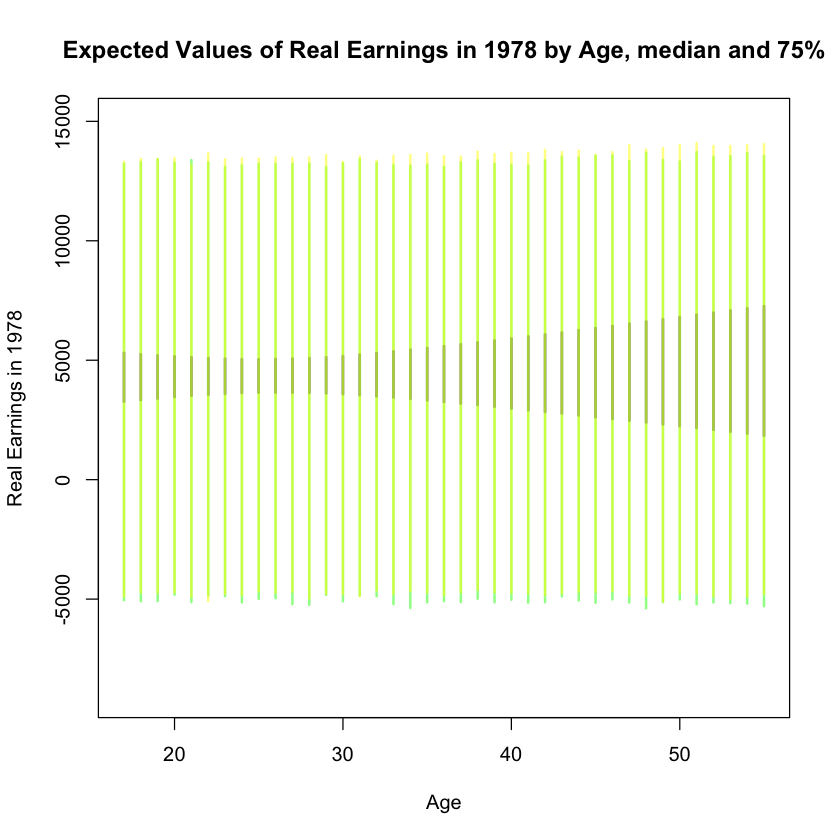

In [131]:
plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,55), ylim = c(-9000,15000), 
     main = "Expected and Predicted Values of Real Earnings in 1978 by Age, median and 75%", xlab = "Age", 
     ylab = "Real Earnings in 1978")

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.expected_med[1, age - 16],
    x1 = age,
    y1 = CI.expected_med[2, age - 16],
    lwd = 2,
  col = rgb(1,0,0,.5)) # red, translucent
}

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.expected_75p[1, age - 16],
    x1 = age,
    y1 = CI.expected_75p[2, age - 16],
    lwd = 2,
  col = rgb(0,0,1,.5)) # blue, translucent
}

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.predicted_med[1, age - 16],
    x1 = age,
    y1 = CI.predicted_med[2, age - 16],
    lwd = 2,
  col = rgb(0,1,0,.5)) # green, translucent
}

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.predicted_75p[1, age - 16],
    x1 = age,
    y1 = CI.predicted_75p[2, age - 16],
    lwd = 2,
  col = rgb(1,1,0,.5)) # yellow, translucent
}

In [69]:
head(CI.expected_med)
head(CI.expected_75p)

[,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
5%  3260.391 3326.312 3388.746 3456.200 3510.891 3550.888 3585.682 3622.521
95% 5316.835 5257.941 5208.493 5166.943 5129.704 5095.057 5071.940 5052.929
    [,9]     [,10]    [,11] [,12]    [,13]    [,14]    [,15]    [,16]   
5%  3636.203 3643.019 ⋯     2538.690 2466.102 2389.270 2309.481 2236.486
95% 5045.695 5054.149 ⋯     6439.891 6538.888 6629.198 6720.827 6813.091
    [,17]    [,18]    [,19]    [,20]    [,21]   
5%  2159.472 2084.177 2005.404 1918.766 1832.346
95% 6909.873 6997.919 7091.066 7179.912 7272.732

[,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
5%  3260.391 3326.312 3388.746 3456.200 3510.891 3550.888 3585.682 3622.521
95% 5316.835 5257.941 5208.493 5166.943 5129.704 5095.057 5071.940 5052.929
    [,9]     [,10]    [,11] [,12]    [,13]    [,14]    [,15]    [,16]   
5%  3636.203 3643.019 ⋯     2538.690 2466.102 2389.270 2309.481 2236.486
95% 5045.695 5054.149 ⋯     6439.891 6538.888 6629.198 6720.827 6813.091
    [,17]    [,18]    [,19]    [,20]    [,21]   
5%  2159.472 2084.177 2005.404 1918.766 1832.346
95% 6909.873 6997.919 7091.066 7179.912 7272.732

super similar because because mostly dependent on intercept, age, and education which has almost identical median and 75%; the beta weights on everything else is multiples of ten less than these factors. 

__________________

# Q3

In [17]:
library(datasets)
print('Removing all trt2 obsevarions...')
PG_noT2 = PlantGrowth[PlantGrowth$group != "trt2",]
paste('removed', dim(PlantGrowth)[1]-dim(PG_noT2)[1], 'items')

print('Converting treatment into dummy vars...')
Treat1=ifelse(PG_noT2$group =="trt1",1,0)
PG_noT2 = data.frame(PG_noT2,Treat1)
PG_noT2

[1] "Removing all trt2 obsevarions..."


[1] "removed 10 items"

[1] "Converting treatment into dummy vars..."


weight group Treat1
1  4.17   ctrl  0     
2  5.58   ctrl  0     
3  5.18   ctrl  0     
4  6.11   ctrl  0     
5  4.50   ctrl  0     
6  4.61   ctrl  0     
7  5.17   ctrl  0     
8  4.53   ctrl  0     
9  5.33   ctrl  0     
10 5.14   ctrl  0     
11 4.81   trt1  1     
12 4.17   trt1  1     
13 4.41   trt1  1     
14 3.59   trt1  1     
15 5.87   trt1  1     
16 3.83   trt1  1     
17 6.03   trt1  1     
18 4.89   trt1  1     
19 4.32   trt1  1     
20 4.69   trt1  1

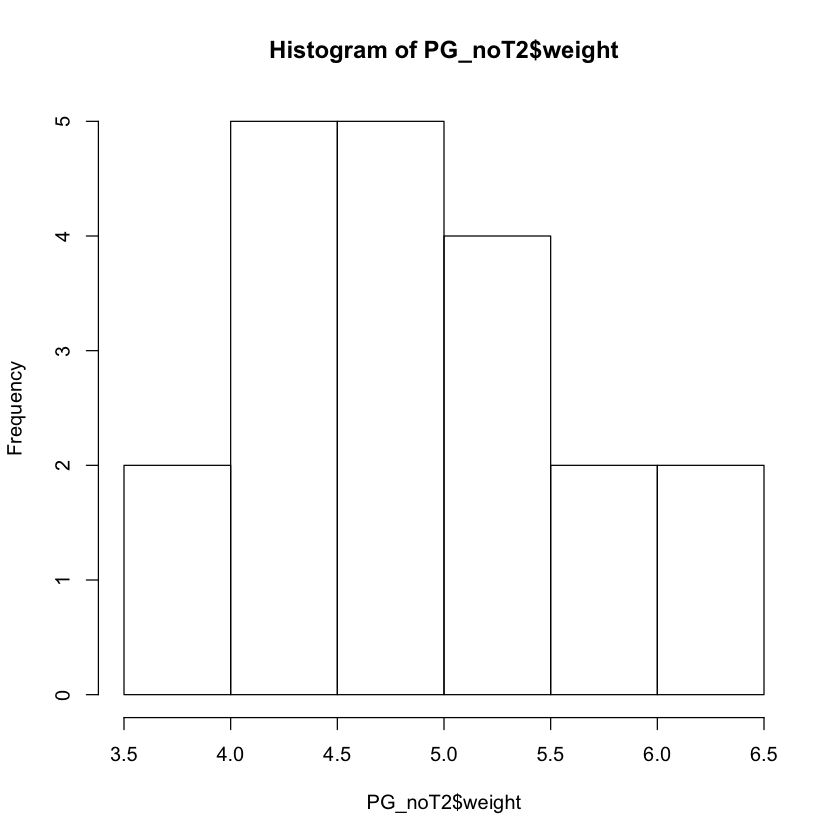

In [18]:
hist(PG_noT2$weight)

In [44]:
B = 1000 ## number of bootstraps
n = length(PG_noT2$weight)

CI_boots = matrix(NA, nrow = B, ncol = 2) ## matrix to hold results
for(b in 1:B){
    i = sample(x = 1:n, size = n, replace = TRUE) ## sample indices
    bootSample = PG_noT2$weight[i] ## get data
    thetaHat =  quantile(bootSample,probs = c(0.05, 0.95)) ## calculate CI for bootstrap sample
    CI_boots[b,1] = thetaHat[1] ## store results
    CI_boots[b,2] = thetaHat[2] ## store results
}

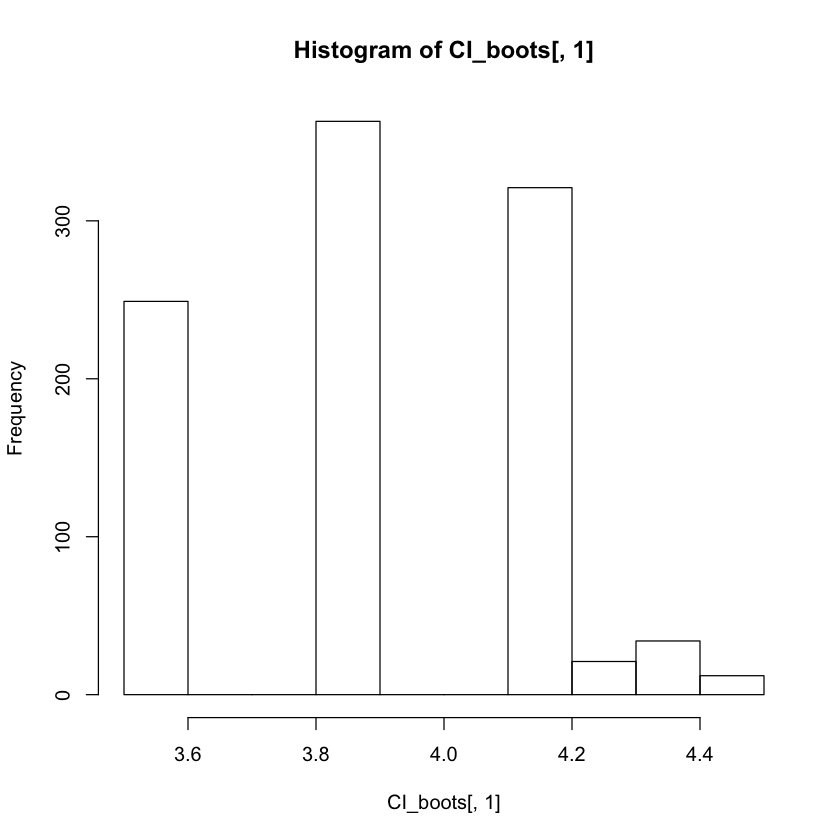

In [47]:
hist(CI_boots[,1])

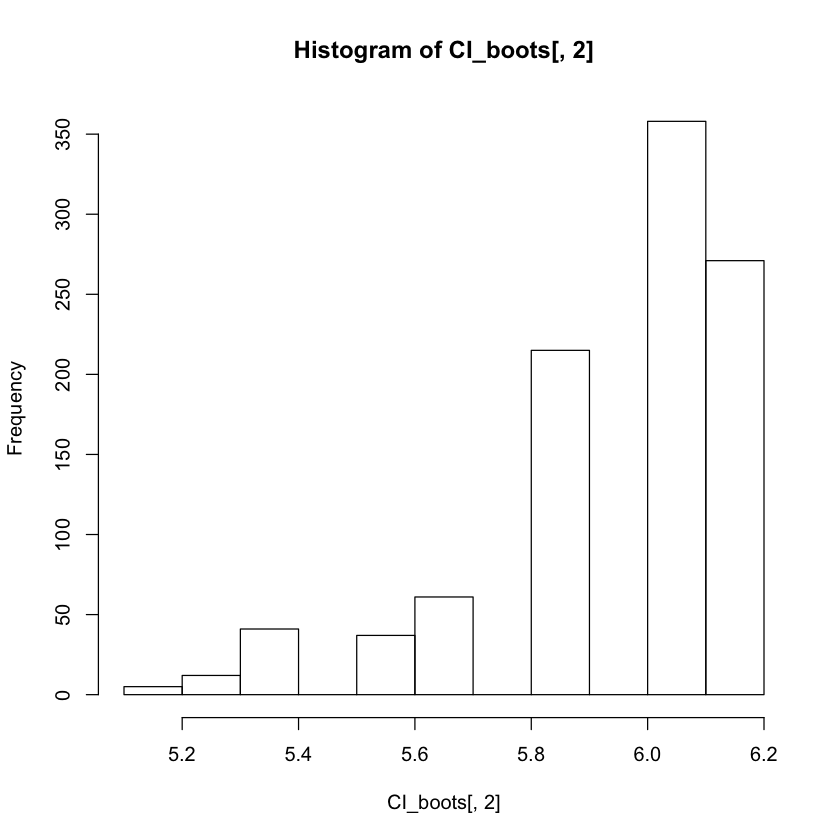

In [46]:
hist(CI_boots[,2])

In [52]:
mod_PG = lm(weight ~ Treat1, data = PG_noT2)
confint(mod_PG, level = 0.9)

5 %        95 %     
(Intercept)  4.6501285 5.4138715
Treat1      -0.9110478 0.1690478

Very unstable bounds, underlying dataset is way too small (only 20 observations) and the distribution of weight from the start is not normal (assumptions for analytical approaches don't hold). The bootstrap approach is slightly more reliable but still questionable due to the small ammount of data

# Q4

In [62]:
# long way
get_rsq <- function(y_act, y_pred) {
    y_bar = mean(y_act)
    tss <- sum((y_act - y_bar)^2)
    rss <- sum((y_act-y_pred)^2)
    return(1-(rss/tss))
}

# short way, hack since using cor func?
get_rsq_hack <- function(y_act, y_pred) {
    return(cor(y_act, y_pred) ^ 2)
}

In [63]:
weight_pred = predict(mod_PG,PG_noT2)
paste('R^2 for the model on PG w/o trt2 is: ',get_rsq(PG_noT2$weight, weight_pred))


[1] "R^2 for the model on PG w/o trt2 is:  0.0730775989903854"

# Q5

In [86]:
library(foreign) 

nsw <- read.dta("http://www.nber.org/~rdehejia/data/nsw.dta")
treated = ifelse(nsw$treat ==1,"Yes","No")
nsw = data.frame(nsw, treated)
head(nsw)

data_id        treat age education black hispanic married nodegree re75
1 Lalonde Sample 1     37  11        1     0        1       1        0   
2 Lalonde Sample 1     22   9        0     1        0       1        0   
3 Lalonde Sample 1     30  12        1     0        0       0        0   
4 Lalonde Sample 1     27  11        1     0        0       1        0   
5 Lalonde Sample 1     33   8        1     0        0       1        0   
6 Lalonde Sample 1     22   9        1     0        0       1        0   
  re78       treated
1  9930.0459 Yes    
2  3595.8940 Yes    
3 24909.4492 Yes    
4  7506.1460 Yes    
5   289.7899 Yes    
6  4056.4939 Yes

In [104]:
# model probability of being assigned to treatment group 

treat_prob_lm = glm(formula = treated ~ age + education + black + hispanic + married + nodegree + re75, family="binomial",data = nsw)


In [107]:
treat_prob_lm$coef

(Intercept)           age     education         black      hispanic 
 4.342682e-01 -1.624368e-03 -2.378422e-02 -9.743252e-02 -2.525250e-01 
      married      nodegree          re75 
 9.292092e-02 -5.292442e-01 -3.120706e-06

In [110]:
get_treatment_prob <- function(coefs, person) {
  logit <- coefs[1] + person[1]*coefs[2] +
    person[2]*coefs[3] +
    person[3]*coefs[4] + 
    person[4]*coefs[5] +
    person[5]*coefs[6] +
    person[6]*coefs[7] +
    person[7]*coefs[8]
  return(exp(logit) / (1 + exp(logit)))
}

In [154]:
nsw_treat = nsw[nsw$treated == "Yes",]
nsw_notreat = nsw[nsw$treated == "No",]

storage.treatment_probs_t <- rep(NA, nrow(nsw_treat)) 
storage.treatment_probs_nt <- rep(NA, nrow(nsw_notreat))                               

for (obs in 1:length(storage.treatment_probs_t)) {
    person <- nsw_treat[obs,c("age","education","black","hispanic","married","nodegree","re75")] 
    storage.treatment_probs_t[obs] <- as.numeric(get_treatment_prob(treat_prob_lm$coef, person))
}

for (obs in 1:length(storage.treatment_probs_nt)) {
    person <- nsw_notreat[obs,c("age","education","black","hispanic","married","nodegree","re75")] 
    storage.treatment_probs_nt[obs] <- as.numeric(get_treatment_prob(treat_prob_lm$coef, person))
}

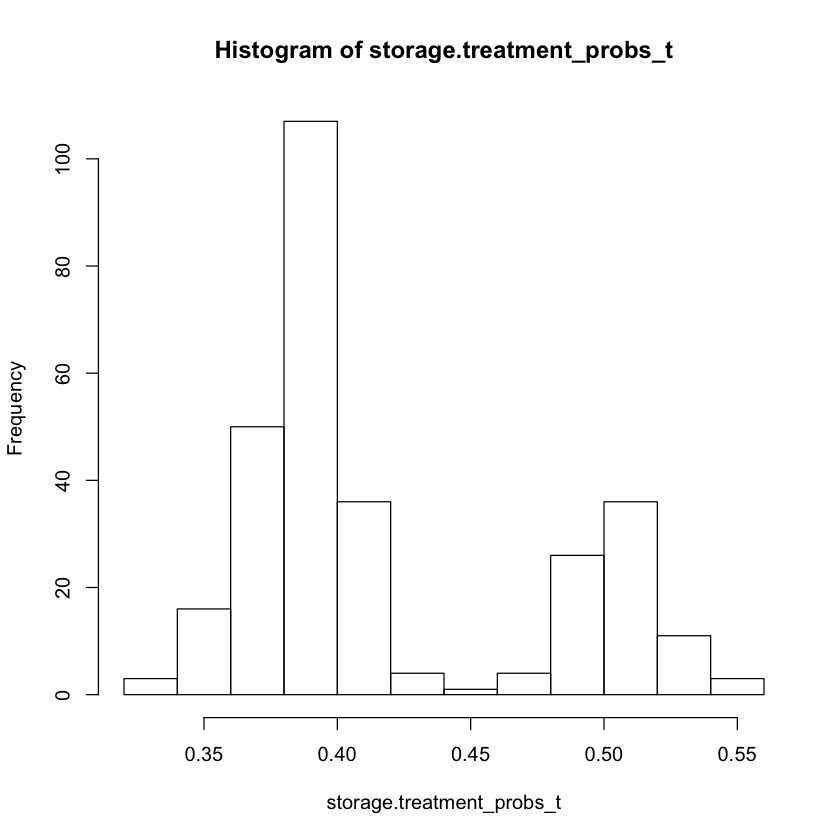

In [155]:
hist(storage.treatment_probs_t)

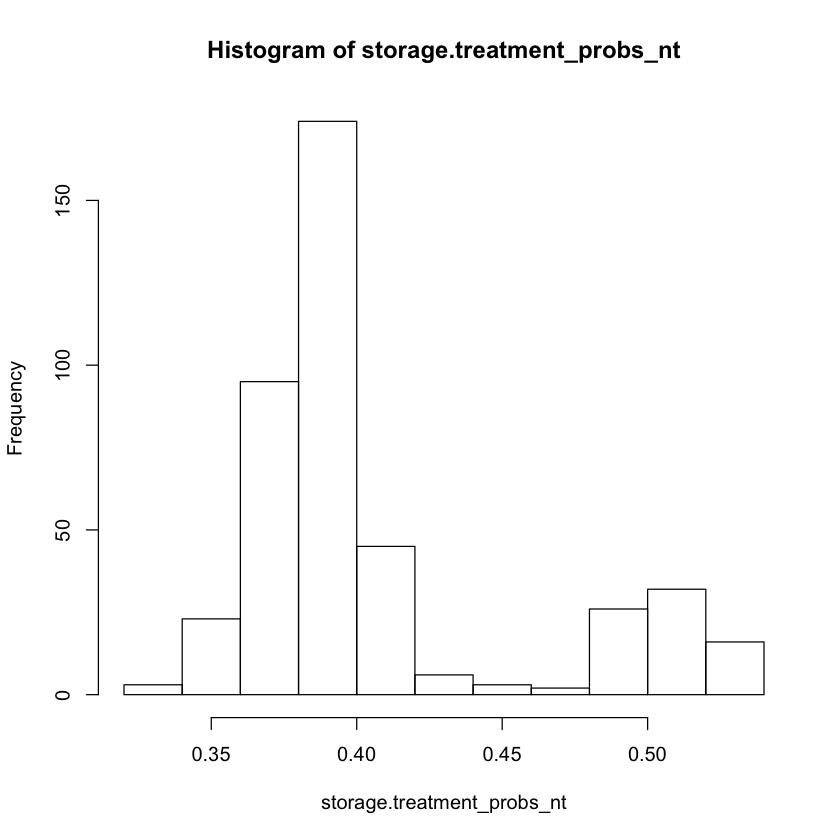

In [156]:
hist(storage.treatment_probs_nt)

really interestingly it shows that the distributions of probabilities are about the same in both groups, indicating perhaps that the assignment was randomized well.

That said, the distributions, while similar, are interestingly skewed towards no treatment as well as bimodal. 